This is a notebook to setup the environment, explore an upper level ontology called SULO (Simplified Upper Level Ontology), and perform some automated reasoning, query, and visualization.

First, let's setup a virtual environment, and install the required libraries for the tutorial.

In [1]:
#!python -m venv .venv
#!source .venv/bin/activate
#!pip install -r requirements.txt

Now let's load the SULO ontology from it's location on the web and print out its base IRI.

In [1]:
from owlready2 import *
from lib.helpers import *
from graphviz import Digraph

# Load SULO (remote import)
sulo = get_ontology("https://w3id.org/sulo/sulo.owl").load()  # RDF/XML
print("Loaded SULO:", sulo.base_iri)


Loaded SULO: https://w3id.org/sulo/


Let's now visualize the class hierarchy in SULO using a functions defined in lib/helpers.py.

SULO Class hierarchy


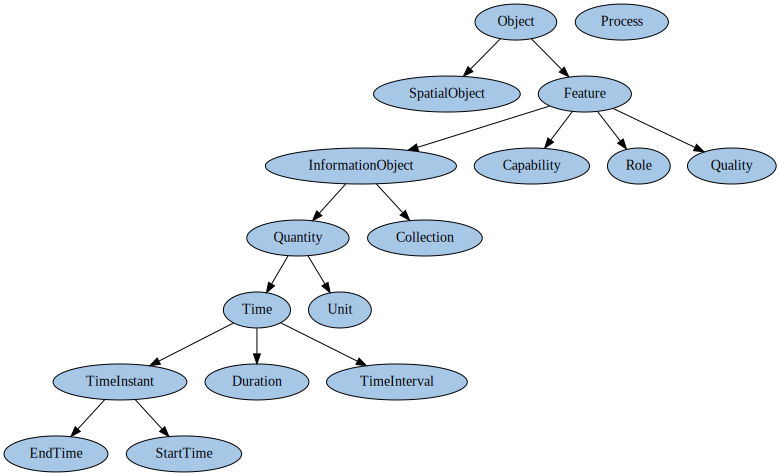

In [2]:
sulo_class_tree = get_color_tree(sulo)
print("SULO Class hierarchy")
display(sulo_class_tree)  # Class hierarchy


SULO Property map


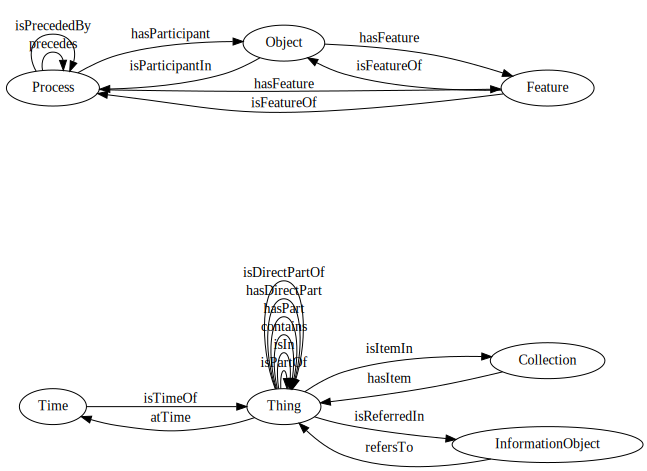

In [3]:
print("SULO Property map")
sulo_property_map = onto_property_map(sulo)
display(sulo_property_map)    # Property domain-range map


In [4]:
result = safe_call_reasoner(sulo)

print("SULO ontology after reasoning has", len(list(sulo.classes())), "classes")
print("SULO ontology after reasoning has", len(list(sulo.object_properties())), "object properties")
print("SULO ontology after reasoning has", len(list(sulo.data_properties())), "data properties")
print("SULO ontology after reasoning has", len(list(sulo.individuals())), "individuals")
print("SULO ontology has", len(result["inconsistent"]), "inconsistent classes")
for ic in result["inconsistent"]:
    print(" -", ic)

SULO ontology after reasoning has 17 classes
SULO ontology after reasoning has 18 object properties
SULO ontology after reasoning has 1 data properties
SULO ontology after reasoning has 0 individuals
SULO ontology has 0 inconsistent classes


In [5]:
# get the label for quantity
sulo.Quantity.label

[locstr('quantity', 'en')]

In [6]:
# query the SULO ontology for all subclasses of Quantity, excluding Quantity itself
print("SULO Quantity descendents:")
for cls in sulo.Quantity.descendants():
    if cls is not sulo.Quantity:
        print(" -", cls.name)

SULO Quantity descendents:
 - EndTime
 - Time
 - TimeInstant
 - Duration
 - TimeInterval
 - Unit
 - StartTime


In [7]:
# get the ancestors of sulo.Quantity, excluding Quantity
print("SULO Quantity ancestors:")
for anc in sulo.Quantity.ancestors():
    if anc is not sulo.Quantity:
        print(" -", anc.name)

SULO Quantity ancestors:
 - InformationObject
 - Feature
 - Thing
 - Object
